# Visualise the pre-trained agent in action

Modify the path to the weights and run the notebook.

In [1]:
WEIGHTS = './weights-5000'  # NB: without '.pth'
METRICS = './metrics.csv'

In [2]:
import sys
import torch
import gymnasium as gym
import matplotlib.pyplot as plt

from upload.agent import DeepQ

sys.path.append('../')
from utilities import visualisation  # noqa

## Parameters

In [ ]:
network = {"inputs": 128, "outputs": 5, "nodes": [512, 256]}
optimizer = {"optimizer": torch.optim.RMSprop, "lr": 0.0025}
skip = 4

## Setup

In [ ]:
value_agent = DeepQ(
    network=network, optimizer=optimizer,
    exploration_rate=0.001,
)

weights = torch.load(f'{WEIGHTS}.pth', map_location=torch.device('cpu'))
value_agent.load_state_dict(weights)

environment = gym.make('ALE/Tetris-ram-v5', render_mode="rgb_array",
                       obs_type="ram", frameskip=1, repeat_action_probability=0.0)
environment.metadata["render_fps"] = 30

## Visualise

### Plotting the metrics from the csv-file created during training.

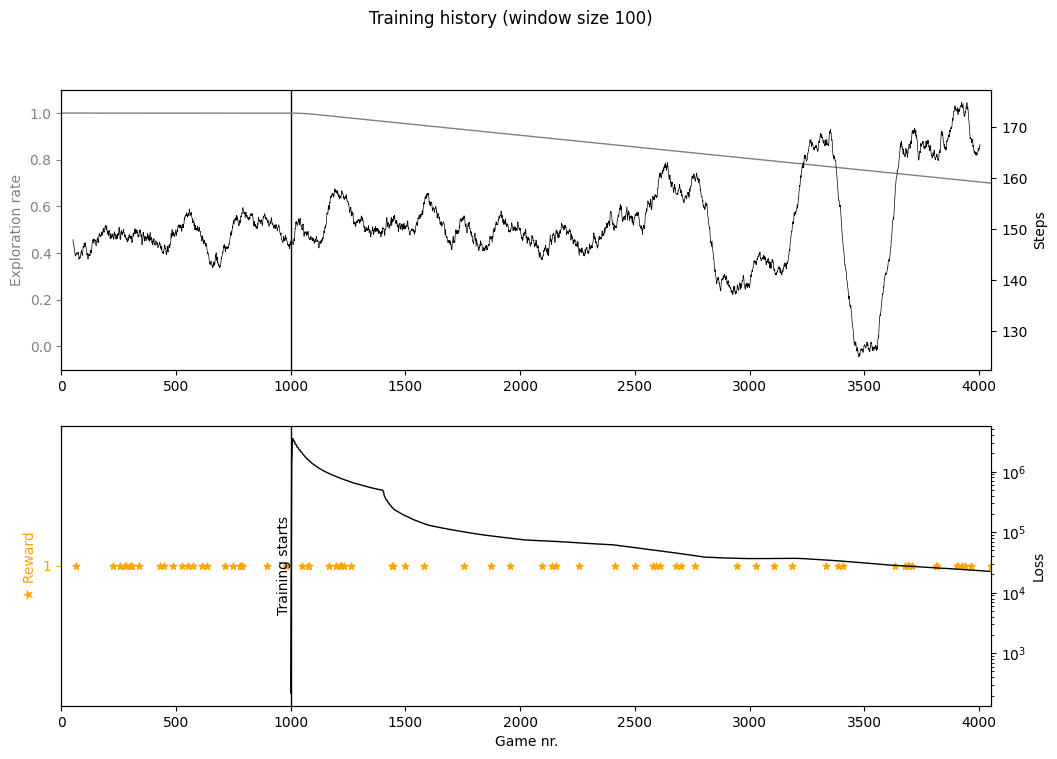

In [4]:
visualisation.graph(METRICS, title="Training history", window=100) if METRICS else None
plt.show() if METRICS else None

### Creating and saving a gif of the agent in action. The gif will be saved to the given path.

In [ ]:
visualisation.gif(environment, value_agent, f'./{WEIGHTS}.gif', skip)